<a href="https://colab.research.google.com/github/yForecasting/intro_python/blob/main/tutorials/deeplearning/RNN_stockprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN tutorial

## Data Reading

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
train = pd.read_csv("Google_Stock_Price_Train.csv")

In [ ]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


We select open stock value

In [ ]:
training_set = train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

## Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled.shape

(1258, 1)

In [ ]:
xtrain = []
ytrain = []
for i in range(60, 1258):
  xtrain.append(training_set_scaled[i-60:i,0])
  ytrain.append(training_set_scaled[i,0])
xtrain, ytrain = np.array(xtrain), np.array(ytrain)

Reshape xtrain to batch size(size inputs), timestep, input dimension

In [ ]:
xtrain.shape

(1198, 60)

In [ ]:
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))
xtrain.shape

(1198, 60, 1)

## Deep learning RNN

Deep learning: building the RNN for predicting the stock price of google in the month of January 2017. RNN: all the LSTM layer + some Dropout regularisation. Dropout regularisation is used to avoid overfitting. The compiling process of the RNN was done follwing with the fitting of the training set. Predictions are visualised. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Make object for sequence of layers

In [ ]:
regressor = Sequential()

Add LSTM layer and Dropout regularisation

### Configuration 1

In [ ]:
# LSTM Layer 1
regressor.add(LSTM(units = 100, return_sequences=True, input_shape=(xtrain.shape[1],1)))
regressor.add(Dropout(0.4)) # 40 % of 100 neurons will be dropped
# LSTM Layer 2
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.6))
# LSTM Layer 3
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.6))
# LSTM Layer 4
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.4))
# Output layer
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
%%capture 
regressor.fit(xtrain, ytrain, epochs=10, batch_size=32) # set epochs to 100

In [ ]:
test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = test.iloc[:,1:2].values
total_data = pd.concat([train['Open'],test['Open']],axis=0)

In [ ]:
total_data.head()

0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64

In [ ]:
inputs=total_data[len(train)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
xtest=[]
for i in range(60,80):
    xtest.append(inputs[i-60:i,0])
xtest=np.array(xtest)
#xtest.shape
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))

In [ ]:
predicted_stock_price=regressor.predict(xtest)

In [ ]:
predicted_stock_price.shape

(20, 60, 1)

In [ ]:
predicted_stock_price

array([[[0.35361928],
        [0.47329906],
        [0.52186114],
        ...,
        [0.52556694],
        [0.5255707 ],
        [0.52557504]],

       [[0.35360223],
        [0.47324967],
        [0.521824  ],
        ...,
        [0.5255709 ],
        [0.5255752 ],
        [0.5255564 ]],

       [[0.3535721 ],
        [0.47322583],
        [0.52181125],
        ...,
        [0.5255756 ],
        [0.5255566 ],
        [0.5255533 ]],

       ...,

       [[0.35361058],
        [0.47329786],
        [0.5219073 ],
        ...,
        [0.52601916],
        [0.52610624],
        [0.5261965 ]],

       [[0.35361412],
        [0.4733085 ],
        [0.5219181 ],
        ...,
        [0.52610654],
        [0.5261967 ],
        [0.52628636]],

       [[0.35362074],
        [0.47331676],
        [0.5219245 ],
        ...,
        [0.526197  ],
        [0.5262866 ],
        [0.526349  ]]], dtype=float32)

In [ ]:
nsamples, nx, ny = predicted_stock_price.shape
predicted_stock_price = predicted_stock_price.reshape((nsamples,nx*ny))

In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price.shape

(20, 60)

In [ ]:
predicted_stock_price[:,1]

array([533.54663, 533.5201 , 533.50726, 533.51624, 533.51227, 533.52356,
       533.536  , 533.5366 , 533.5352 , 533.5475 , 533.56433, 533.57025,
       533.5578 , 533.5495 , 533.5564 , 533.5567 , 533.54736, 533.546  ,
       533.5517 , 533.55615], dtype=float32)

In [ ]:
predicted_stock_price[1,:]

array([469.20242, 533.5201 , 559.6317 , 566.201  , 564.5408 , 560.68964,
       557.41254, 555.6244 , 555.31274, 556.08093, 557.4454 , 558.97925,
       560.3817 , 561.4987 , 562.2865 , 562.7591 , 562.96875, 562.9872 ,
       562.88513, 562.71704, 562.52277, 562.3279 , 562.1587 , 562.02094,
       561.9122 , 561.8323 , 561.7793 , 561.75806, 561.7713 , 561.8084 ,
       561.844  , 561.8773 , 561.9181 , 561.95306, 561.9749 , 561.99677,
       562.01514, 562.0238 , 562.0285 , 562.0304 , 562.0223 , 562.0324 ,
       562.0649 , 562.0929 , 562.1032 , 562.0557 , 561.96246, 561.85175,
       561.76227, 561.7184 , 561.71326, 561.7154 , 561.7167 , 561.70795,
       561.68713, 561.65875, 561.644  , 561.64594, 561.6482 , 561.6381 ],
      dtype=float32)

In [ ]:
predicted_stock_price=predicted_stock_price[1,:]

### Show Stock Price

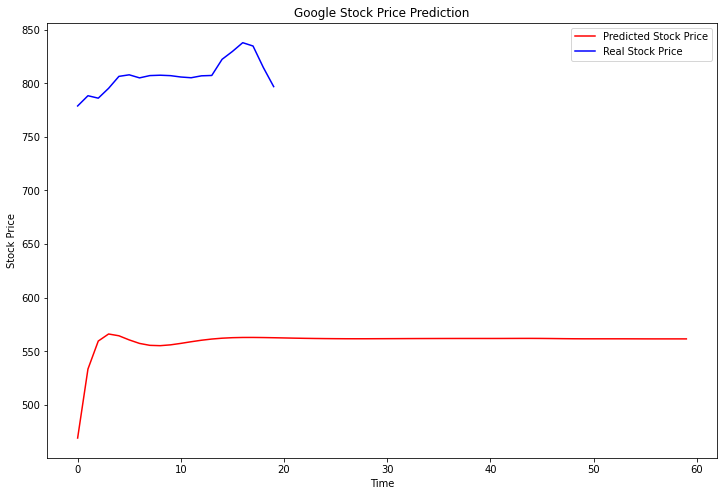

In [ ]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(predicted_stock_price,color='red',label='Predicted Stock Price')
plt.plot(real_stock_price,color='blue',label='Real Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Configuration 2

In [ ]:
regressor2 = Sequential()
# LSTM Layer 1
regressor2.add(LSTM(units = 50, return_sequences=True, input_shape=(xtrain.shape[1],1)))
regressor2.add(Dropout(0.2)) # 20 % of 50 neurons will be dropped
# LSTM Layer 2
regressor2.add(LSTM(units=50, return_sequences=True))
regressor2.add(Dropout(0.2))
# LSTM Layer 3
regressor2.add(LSTM(units=50, return_sequences=True))
regressor2.add(Dropout(0.2))
# LSTM Layer 4
regressor2.add(LSTM(units=50, return_sequences=True))
regressor2.add(Dropout(0.2))
# Output layer
regressor2.add(Dense(units=1))
regressor2.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
%%capture 
regressor2.fit(xtrain, ytrain, epochs=10, batch_size=32) # set epochs to 100

In [ ]:
test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = test.iloc[:,1:2].values
total_data = pd.concat([train['Open'],test['Open']],axis=0)
inputs=total_data[len(train)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs = sc.transform(inputs)
xtest=[]
for i in range(60,80):
    xtest.append(inputs[i-60:i,0])
xtest=np.array(xtest)
#xtest.shape
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))

In [ ]:
predicted_stock_price2=regressor2.predict(xtest)

In [ ]:
nsamples, nx, ny = predicted_stock_price2.shape
predicted_stock_price2 = predicted_stock_price2.reshape((nsamples,nx*ny))
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)
predicted_stock_price2=predicted_stock_price2[1,:]

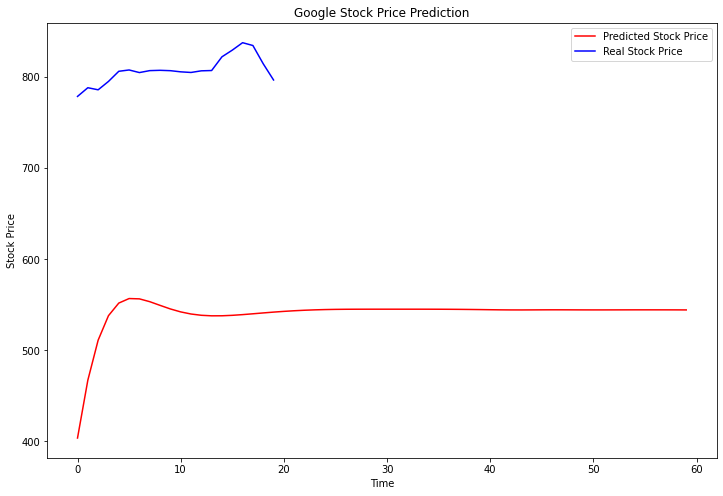

In [ ]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(predicted_stock_price2,color='red',label='Predicted Stock Price')
plt.plot(real_stock_price,color='blue',label='Real Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

NOTE: something went wrong in the reverse transformation of the min max scaler.